In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2 
from statsmodels.tsa.seasonal import seasonal_decompose
from math import sqrt
import seaborn as sns
sns.set()
from IPython.display import display, Math, Latex

In [ ]:
df = pd.read_csv('/content/BTC-USD.csv')

In [ ]:
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,8597.308594,8977.726563,8597.308594,8909.819336,8909.819336,28647338393
1,2020-01-28,8912.524414,9358.589844,8908.447266,9358.589844,9358.589844,34398744403
2,2020-01-29,9357.470703,9406.431641,9269.467773,9316.629883,9316.629883,30682598115
3,2020-01-30,9316.016602,9553.125977,9230.897461,9508.993164,9508.993164,32378792851
4,2020-01-31,9508.313477,9521.706055,9230.776367,9350.529297,9350.529297,29432489719


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1050,2022-12-12,17102.500000,17212.564453,16899.394531,17206.437500,17206.437500,19617581341
1051,2022-12-13,17206.441406,17930.085938,17111.763672,17781.318359,17781.318359,26634741631
1052,2022-12-14,17782.066406,18318.531250,17739.513672,17815.650391,17815.650391,25534481470
1053,2022-12-15,17813.644531,17846.744141,17322.589844,17364.865234,17364.865234,20964448341
1054,2022-12-16,17364.546875,17505.525391,16584.701172,16647.484375,16647.484375,24031608960


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1.055000e+03
mean,29580.063283,30318.089384,28746.040521,29583.522647,29583.522647,3.728550e+10
std,17079.864548,17529.639491,16548.177879,17066.663117,17066.663117,1.899035e+10
min,5002.578125,5331.833984,4106.980957,4970.788086,4970.788086,1.225260e+10
25%,11888.652832,12056.110840,11723.625977,11904.569336,11904.569336,2.589761e+10
50%,28622.625000,28937.740234,27360.089844,28627.574219,28627.574219,3.345136e+10
75%,43532.716797,44490.070312,42563.951172,43551.312500,43551.312500,4.368372e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


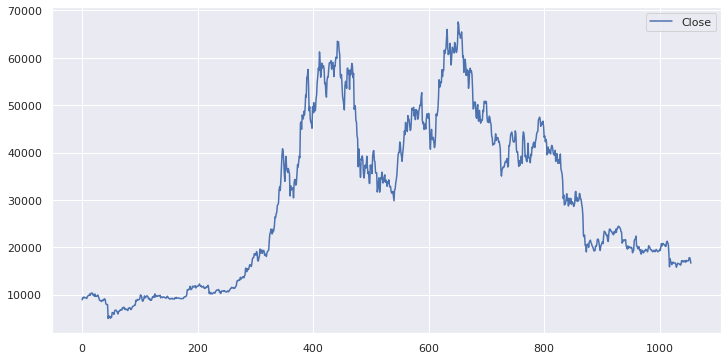

In [ ]:
df[['Close']].plot(figsize=(12,6));


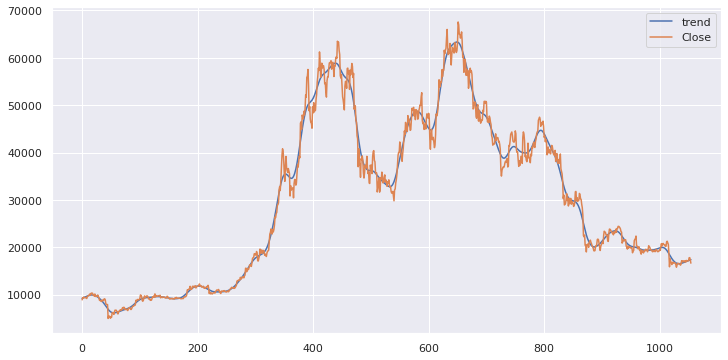

In [ ]:
from statsmodels.tsa.filters.hp_filter import hpfilter
gdp_cycle, gdp_trend = hpfilter(df['Close'], lamb=1600)
df['trend'] = gdp_trend
df[['trend','Close']].plot(figsize=(12,6))
#tendencia

In [ ]:
sts.adfuller(df.Close)
#no se rechaza la hipotesis nula
#la serie no es estacionaria

(-1.4116190415142555,
 0.5766933023575134,
 0,
 1054,
 {'1%': -3.4365694473419928,
  '5%': -2.8642860655788693,
  '10%': -2.568232111086707},
 17739.313225334805)

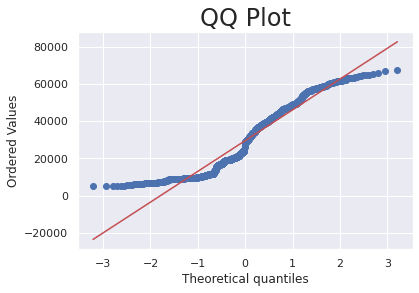

In [ ]:
import scipy.stats

scipy.stats.probplot(df.Close, plot =  plt)
plt.title("QQ Plot", size = 24)
plt.show()

In [ ]:
df['returns'] = df.Close.pct_change(1)*100

In [ ]:
df['sq_returns'] = df.returns.mul(df.returns)


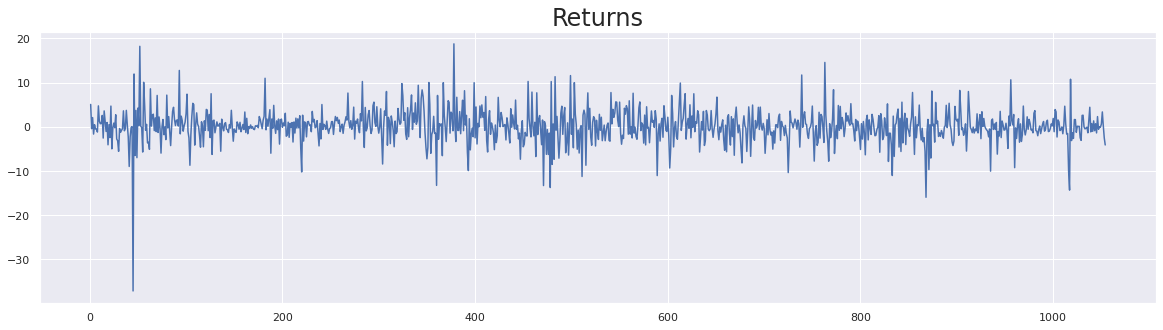

In [ ]:
df.returns.plot(figsize=(20,5))
plt.title("Returns", size = 24)
plt.show()


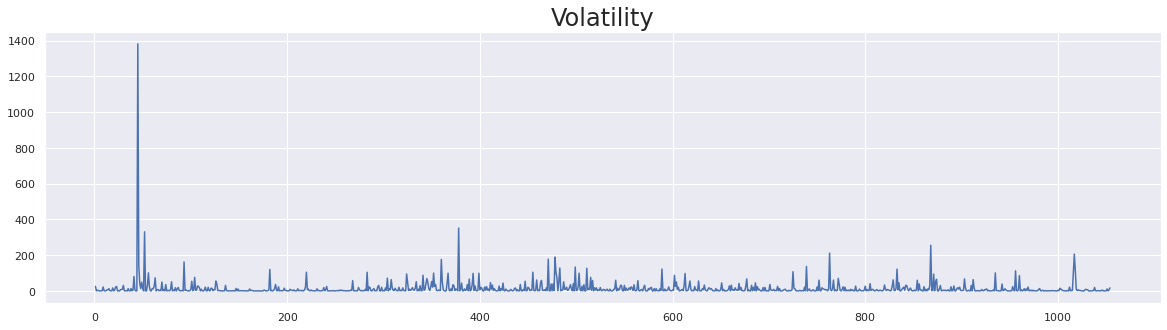

In [ ]:
df.sq_returns.plot(figsize=(20,5))
plt.title("Volatility", size = 24)
plt.show()

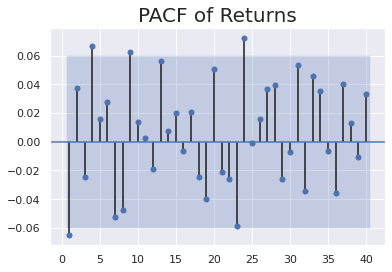

In [ ]:
sgt.plot_pacf(df.returns[1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of Returns", size = 20)
plt.show()

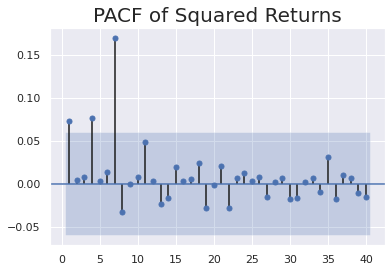

In [ ]:
sgt.plot_pacf(df.sq_returns[1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of Squared Returns", size = 20)
plt.show()

In [ ]:
!pip install arch


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 907.3/907.3 KB 10.6 MB/s eta 0:00:00


In [ ]:
from arch import arch_model


In [ ]:
display(Math(r'\sigma_{t}^2 = \omega_0 + \sum_{i=1}^p \alpha_1\in_{t-1}^2'))
#Modelo ARCH

<IPython.core.display.Math object>

In [ ]:
model_arch_1 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 1)
results_arch_1 = model_arch_1.fit(update_freq = 1)
results_arch_1.summary()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 3010.3954090818197
Iteration:      2,   Func. Count:     11,   Neg. LLF: 2912.8019979667106
Iteration:      3,   Func. Count:     16,   Neg. LLF: 2918.408491296861
Iteration:      4,   Func. Count:     21,   Neg. LLF: 2913.545730624316
Iteration:      5,   Func. Count:     26,   Neg. LLF: 2908.503302276801
Iteration:      6,   Func. Count:     30,   Neg. LLF: 2908.5018131876077
Iteration:      7,   Func. Count:     35,   Neg. LLF: 2908.4934212265566
Iteration:      8,   Func. Count:     39,   Neg. LLF: 2908.493366913586
Iteration:      9,   Func. Count:     42,   Neg. LLF: 2908.4933669136303
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2908.493366913586
            Iterations: 9
            Function evaluations: 42
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -2908.49
Distribution:                  Normal   AIC:                           5822.99
Method:            Maximum Likelihood   BIC:                           5837.87
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:24:03   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1422      0.119      1.192      0.233 [-9.170e-02,  0.376]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega         14.0389      1.873      7.496  6.561e-14    [ 10.368, 17.709]
alpha[1]       0.0437  3.713e-02      1.177      0.239 [-2.908e-02,  0.116]
===========================================================================

Covariance estimator: robust
"""

In [ ]:
model_arch_2 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 2)
results_arch_2 = model_arch_2.fit(update_freq = 5)
results_arch_2.summary()

Iteration:      5,   Func. Count:     32,   Neg. LLF: 2911.0314019860143
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2908.4931427211714
            Iterations: 9
            Function evaluations: 55
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -2908.49
Distribution:                  Normal   AIC:                           5824.99
Method:            Maximum Likelihood   BIC:                           5844.83
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:24:03   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1424      0.120      1.184      0.237 [-9.340e-02,  0.378]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega         14.0372      1.891      7.424  1.137e-13      [ 10.331, 17.743]
alpha[1]       0.0435  3.779e-02      1.152      0.249   [-3.053e-02,  0.118]
alpha[2]   2.3454e-04  8.466e-03  2.771e-02      0.978 [-1.636e-02,1.683e-02]
=============================================================================

Covariance estimator: robust
"""

In [ ]:
model_arch_3 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 3)
results_arch_3 = model_arch_3.fit(update_freq = 5)
results_arch_3.summary()

Iteration:      5,   Func. Count:     35,   Neg. LLF: 3075.1210602587057
Iteration:     10,   Func. Count:     71,   Neg. LLF: 2907.996254586811
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2907.9962444732273
            Iterations: 12
            Function evaluations: 82
            Gradient evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -2908.00
Distribution:                  Normal   AIC:                           5825.99
Method:            Maximum Likelihood   BIC:                           5850.79
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:24:03   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1546      0.125      1.232      0.218 [-9.130e-02,  0.400]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega         13.7693      2.046      6.729  1.707e-11      [  9.759, 17.780]
alpha[1]       0.0437  3.828e-02      1.142      0.254   [-3.132e-02,  0.119]
alpha[2]   6.0592e-04  8.795e-03  6.889e-02      0.945 [-1.663e-02,1.784e-02]
alpha[3]       0.0181  2.704e-02      0.671      0.502 [-3.485e-02,7.113e-02]
=============================================================================

Covariance estimator: robust
"""

In [ ]:
model_arch_13 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 13)
results_arch_13 = model_arch_13.fit(update_freq = 5)
results_arch_13.summary()

Iteration:      5,   Func. Count:     89,   Neg. LLF: 4353.708203933821
Iteration:     10,   Func. Count:    174,   Neg. LLF: 2921.934671825584
Iteration:     15,   Func. Count:    261,   Neg. LLF: 2857.9086933808267
Iteration:     20,   Func. Count:    346,   Neg. LLF: 2854.7911462285992
Iteration:     25,   Func. Count:    431,   Neg. LLF: 2854.9797556129297
Iteration:     30,   Func. Count:    517,   Neg. LLF: 2854.8044959843055
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2854.6730734994712
            Iterations: 32
            Function evaluations: 550
            Gradient evaluations: 32


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -2854.67
Distribution:                  Normal   AIC:                           5739.35
Method:            Maximum Likelihood   BIC:                           5813.75
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:24:04   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1845      0.111      1.665  9.588e-02 [-3.266e-02,  0.402]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          6.9998      1.778      3.937  8.264e-05      [  3.515, 10.485]
alpha[1]       0.0678  4.399e-02      1.541      0.123   [-1.842e-02,  0.154]
alpha[2]   1.2507e-03  1.022e-02      0.122      0.903 [-1.879e-02,2.129e-02]
alpha[3]   2.1104e-03  1.176e-02      0.179      0.858 [-2.094e-02,2.516e-02]
alpha[4]       0.2237      0.128      1.753  7.955e-02   [-2.637e-02,  0.474]
alpha[5]   4.0800e-04  2.699e-02  1.511e-02      0.988 [-5.250e-02,5.331e-02]
alpha[6]       0.0501  5.463e-02      0.917      0.359   [-5.697e-02,  0.157]
alpha[7]       0.0538  3.136e-02      1.716  8.618e-02   [-7.654e-03,  0.115]
alpha[8]       0.0264  6.246e-02      0.423      0.672   [-9.601e-02,  0.149]
alpha[9]       0.0152  2.834e-02      0.538      0.591 [-4.029e-02,7.078e-02]
alpha[10]  1.7951e-03  7.013e-03      0.256      0.798 [-1.195e-02,1.554e-02]
alpha[11]      0.0802  5.225e-02      1.534      0.125   [-2.224e-02,  0.183]
alpha[12]      0.0343  8.104e-02      0.424      0.672      [ -0.125,  0.193]
alpha[13]  4.0768e-04  3.946e-02  1.033e-02      0.992 [-7.693e-02,7.775e-02]
=============================================================================

Covariance estimator: robust
"""

In [ ]:
display(Math(r'\sigma_t^2 = \Omega + \sum_{i=1}^p\alpha_1\in_{t-1}^2 + \sum_{j=1}^p\beta_1\sigma_{t-1}^2'))
#Modelo GARCH

<IPython.core.display.Math object>

In [ ]:
model_garch_1_1 = arch_model(df.returns[1:], mean = "Constant", vol = "GARCH", p = 1, q = 1)
results_garch_1_1 = model_garch_1_1.fit(update_freq = 5)
results_garch_1_1.summary()

Iteration:      5,   Func. Count:     34,   Neg. LLF: 2891.4720448831267
Iteration:     10,   Func. Count:     61,   Neg. LLF: 2886.5809366076965
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2886.580935584171
            Iterations: 12
            Function evaluations: 70
            Gradient evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2886.58
Distribution:                  Normal   AIC:                           5781.16
Method:            Maximum Likelihood   BIC:                           5801.00
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:24:04   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1936      0.112      1.727  8.417e-02 [-2.611e-02,  0.413]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          1.0290      0.532      1.936  5.292e-02 [-1.296e-02,  2.071]
alpha[1]       0.0644  3.129e-02      2.058  3.960e-02  [3.065e-03,  0.126]
beta[1]        0.8692  4.433e-02     19.606  1.379e-85    [  0.782,  0.956]
===========================================================================

Covariance estimator: robust
"""

In [ ]:
model_garch_1_2 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 1, q = 2)
results_garch_1_2 = model_garch_1_2.fit(update_freq = 5)
results_garch_1_2.summary()

Iteration:      5,   Func. Count:     37,   Neg. LLF: 2966.8862780011814
Iteration:     10,   Func. Count:     71,   Neg. LLF: 2886.5813636876155
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2886.580935862017
            Iterations: 13
            Function evaluations: 88
            Gradient evaluations: 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2886.58
Distribution:                  Normal   AIC:                           5783.16
Method:            Maximum Likelihood   BIC:                           5807.96
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:24:04   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1936      0.112      1.731  8.340e-02 [-2.557e-02,  0.413]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          1.0289      0.746      1.379      0.168    [ -0.433,  2.491]
alpha[1]       0.0644  4.424e-02      1.456      0.146 [-2.231e-02,  0.151]
beta[1]        0.8692      0.456      1.904  5.686e-02 [-2.538e-02,  1.764]
beta[2]    9.6348e-15      0.392  2.457e-14      1.000    [ -0.769,  0.769]
===========================================================================

Covariance estimator: robust
"""

In [ ]:
model_garch_1_3 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 1, q = 3)
results_garch_1_3 = model_garch_1_3.fit(update_freq = 5)
results_garch_1_3.summary()

Iteration:      5,   Func. Count:     42,   Neg. LLF: 2888.3419076261425
Iteration:     10,   Func. Count:     82,   Neg. LLF: 2873.206161927361
Iteration:     15,   Func. Count:    120,   Neg. LLF: 2873.157380028485
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2873.157188288118
            Iterations: 18
            Function evaluations: 140
            Gradient evaluations: 18


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2873.16
Distribution:                  Normal   AIC:                           5758.31
Method:            Maximum Likelihood   BIC:                           5788.08
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:24:04   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1983      0.111      1.789  7.354e-02 [-1.890e-02,  0.416]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          1.7210      1.006      1.711  8.715e-02    [ -0.251,  3.693]
alpha[1]       0.1590  9.133e-02      1.741  8.175e-02 [-2.003e-02,  0.338]
beta[1]        0.0192      0.297  6.475e-02      0.948    [ -0.562,  0.601]
beta[2]        0.1191      0.258      0.462      0.644    [ -0.387,  0.625]
beta[3]        0.5972      0.114      5.233  1.668e-07    [  0.374,  0.821]
===========================================================================

Covariance estimator: robust
"""

In [ ]:
model_garch_2_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 2, q = 1)
results_garch_2_1 = model_garch_2_1.fit(update_freq = 5)
results_garch_2_1.summary()

Iteration:      5,   Func. Count:     39,   Neg. LLF: 2888.700898013664
Iteration:     10,   Func. Count:     72,   Neg. LLF: 2886.0918933402254
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2886.0918913358246
            Iterations: 12
            Function evaluations: 83
            Gradient evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2886.09
Distribution:                  Normal   AIC:                           5782.18
Method:            Maximum Likelihood   BIC:                           5806.99
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:24:04   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1923      0.112      1.715  8.627e-02 [-2.742e-02,  0.412]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          1.1594      0.726      1.596      0.110    [ -0.264,  2.583]
alpha[1]       0.0427  4.221e-02      1.012      0.311 [-3.999e-02,  0.125]
alpha[2]       0.0312  7.644e-02      0.408      0.683    [ -0.119,  0.181]
beta[1]        0.8517  7.452e-02     11.429  3.002e-30    [  0.706,  0.998]
===========================================================================

Covariance estimator: robust
"""

In [ ]:
model_garch_3_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 3, q = 1)
results_garch_3_1 = model_garch_3_1.fit(update_freq = 5)
results_garch_3_1.summary()

Iteration:      5,   Func. Count:     44,   Neg. LLF: 2886.390775926155
Iteration:     10,   Func. Count:     83,   Neg. LLF: 2881.2922613191786
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2881.291989588186
            Iterations: 12
            Function evaluations: 96
            Gradient evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2881.29
Distribution:                  Normal   AIC:                           5774.58
Method:            Maximum Likelihood   BIC:                           5804.35
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:24:04   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1925      0.117      1.648  9.936e-02 [-3.645e-02,  0.421]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          1.5777      1.007      1.567      0.117      [ -0.396,  3.551]
alpha[1]       0.0282  2.530e-02      1.114      0.265 [-2.141e-02,7.778e-02]
alpha[2]       0.0000  4.923e-02      0.000      1.000 [-9.650e-02,9.650e-02]
alpha[3]       0.0787  8.818e-02      0.893      0.372   [-9.411e-02,  0.252]
beta[1]        0.7929      0.115      6.914  4.710e-12      [  0.568,  1.018]
=============================================================================

Covariance estimator: robust
"""

In [ ]:
display(Math(r'ln\sigma_{t}^2 = \omega_0 + \sum_{i=1}^p\alpha_i(|\in_{t-i}|+\gamma_i\in_{t_i}) + \sum_{j=1}^q\beta_j\ln\sigma_{t-j}^2'))
#Modelo EGARCH

<IPython.core.display.Math object>

In [ ]:
model_garch_3_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "EGARCH", p = 1, o = 1, q = 1)
results_garch_3_1 = model_garch_3_1.fit(update_freq = 5)
results_garch_3_1.summary()

Iteration:      5,   Func. Count:     44,   Neg. LLF: 2919.6781832461675
Iteration:     10,   Func. Count:     76,   Neg. LLF: 2874.6858748845116
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2874.6858748845116
            Iterations: 11
            Function evaluations: 81
            Gradient evaluations: 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - EGARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -2874.69
Distribution:                  Normal   AIC:                           5759.37
Method:            Maximum Likelihood   BIC:                           5784.17
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:24:04   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1409      0.105      1.344      0.179 [-6.454e-02,  0.346]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.2295      0.120      1.910  5.619e-02 [-6.057e-03,  0.465]
alpha[1]       0.1433  3.968e-02      3.612  3.039e-04  [6.555e-02,  0.221]
gamma[1]      -0.0872  5.915e-02     -1.474      0.140  [ -0.203,2.875e-02]
beta[1]        0.9184  4.359e-02     21.071  1.457e-98    [  0.833,  1.004]
===========================================================================

Covariance estimator: robust
"""

In [ ]:
display(Math(r'\sigma_t^2 = \omega + \sum_{i=1}^p\alpha\in_{t-1}^2 + \gamma\in_{t-1}^2I_{|\in_{t-1}<0|} + \sum_{j=1}^p\beta\sigma_{t-1}^2 '))
#modelo GJR-GARCH

<IPython.core.display.Math object>

In [ ]:
am = arch_model(df.returns[1:], p=1, o=1, q=1)
res = am.fit(update_freq=5, disp="off")
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Constant Mean - GJR-GARCH Model Results                    
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -2876.54
Distribution:                  Normal   AIC:                           5763.09
Method:            Maximum Likelihood   BIC:                           5787.89
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:24:05   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1593      0.105      1.513      0.130 [-4.702e-02,  0.366]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          2.1134      7.044      0.300      0.764 [-11.693, 15.919]
alpha[1]       0.0000      0.182      0.000      1.000 [ -0.357,  0.357]
gamma[1]       0.1677      0.496      0.338      0.735 [ -0.804,  1.139]
beta[1]        0.7772      0.528      1.471      0.141 [ -0.258,  1.813]
========================================================================

Covariance estimator: robust
"""

In [ ]:
display(Math(r'\sigma_t = \omega + \sum_{p=1}^1\alpha\in_{t-1} + \sum_{o=1}^o\gamma\in_{t-1}I_{|\in_{t-1}<0|} + \sum_{q=1}^q\beta\sigma_{t-1}'))
#modelo TARCH

<IPython.core.display.Math object>

In [ ]:
am = arch_model(df.returns[1:], p=1, o=1, q=1, power=1.0)
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     41,   Neg. LLF: 4817.965128840573
Iteration:     10,   Func. Count:     75,   Neg. LLF: 2874.088371181646
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2874.084373281867
            Iterations: 14
            Function evaluations: 98
            Gradient evaluations: 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                  Constant Mean - TARCH/ZARCH Model Results                   
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                TARCH/ZARCH   Log-Likelihood:               -2874.08
Distribution:                  Normal   AIC:                           5758.17
Method:            Maximum Likelihood   BIC:                           5782.97
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:24:05   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1599      0.106      1.512      0.130 [-4.736e-02,  0.367]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.2773      0.166      1.674  9.404e-02   [-4.728e-02,  0.602]
alpha[1]       0.0250  3.047e-02      0.821      0.412 [-3.471e-02,8.472e-02]
gamma[1]       0.0946  6.703e-02      1.412      0.158   [-3.674e-02,  0.226]
beta[1]        0.8764  4.614e-02     18.993  1.935e-80      [  0.786,  0.967]
=============================================================================

Covariance estimator: robust
"""

In [ ]:
display(Math(r'h_t = \omega + [1 - \beta\ L - \phi\ L(1-L)^\delta]\in_t^2 + \beta\ h_{t-1}'))
#modelo FIGARCH

<IPython.core.display.Math object>

In [ ]:
from arch.univariate import FIGARCH

In [ ]:
am = arch_model(df.returns[1:], p=1, q=1, power=2.0, vol = "FIGARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     38,   Neg. LLF: 2898.7439185802455
Iteration:     10,   Func. Count:     72,   Neg. LLF: 2889.91068253282
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2889.9088222508153
            Iterations: 14
            Function evaluations: 95
            Gradient evaluations: 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                    Constant Mean - FIGARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                    FIGARCH   Log-Likelihood:               -2889.91
Distribution:                  Normal   AIC:                           5789.82
Method:            Maximum Likelihood   BIC:                           5814.62
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:24:05   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1852      0.133      1.388      0.165 [-7.637e-02,  0.447]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          1.3720      1.652      0.830      0.406 [ -1.867,  4.611]
phi            0.2773      0.259      1.071      0.284 [ -0.230,  0.785]
d              0.3072      0.415      0.741      0.459 [ -0.505,  1.120]
beta           0.5369      0.190      2.831  4.635e-03 [  0.165,  0.909]
========================================================================

Covariance estimator: robust
"""

In [ ]:
display(Math(r'\sigma_t^2 = \omega + \in_{i=1}^m \alpha_l(l_i^{-1} \sum_{j+1}^l \in_{t-j}^2)'))
#modelo HARCH

<IPython.core.display.Math object>

In [ ]:
from arch.univariate import HARCH

In [ ]:
am = arch_model(df.returns[1:], p=1, q=1, power=2.0, vol = "HARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     31,   Neg. LLF: 3138.9038544236996
Iteration:     10,   Func. Count:     54,   Neg. LLF: 2912.764148453702
Iteration:     15,   Func. Count:     74,   Neg. LLF: 2908.5100294567364
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2908.493366945493
            Iterations: 19
            Function evaluations: 89
            Gradient evaluations: 19


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - HARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      HARCH   Log-Likelihood:               -2908.49
Distribution:                  Normal   AIC:                           5822.99
Method:            Maximum Likelihood   BIC:                           5837.87
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:24:06   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1422      0.119      1.192      0.233 [-9.169e-02,  0.376]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega         14.0390      1.873      7.496  6.565e-14    [ 10.368, 17.710]
alpha[1]       0.0437  3.713e-02      1.177      0.239 [-2.908e-02,  0.116]
===========================================================================

Covariance estimator: robust
"""

In [ ]:
display(Math(r'\sigma_t^\delta = \omega + \sum_{i=1}^p\alpha_i(|\in_{t-1}|-\gamma_i\ I_{[0>i]}\in_{t-i})^\delta + \sum_{k=1}^q \beta_k \sigma_{t-k}^\delta'))
#modelo APARCH

<IPython.core.display.Math object>

In [ ]:
from arch.univariate import APARCH


In [ ]:
am = arch_model(df.returns[1:], p=1, o=1, q=1, power=2.0, vol = "APARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     44,   Neg. LLF: 199166.7579307248
Iteration:     10,   Func. Count:     84,   Neg. LLF: 2875.1906253830102
Iteration:     15,   Func. Count:    120,   Neg. LLF: 2874.9175929665475
Iteration:     20,   Func. Count:    155,   Neg. LLF: 2874.874679767113
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2874.8745562212243
            Iterations: 23
            Function evaluations: 175
            Gradient evaluations: 23


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - APARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     APARCH   Log-Likelihood:               -2874.87
Distribution:                  Normal   AIC:                           5761.75
Method:            Maximum Likelihood   BIC:                           5791.51
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:24:06   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1399      0.104      1.349      0.177 [-6.330e-02,  0.343]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.4451      0.727      0.613      0.540   [ -0.979,  1.869]
alpha[1]       0.0753  2.257e-02      3.336  8.503e-04 [3.106e-02,  0.120]
gamma[1]       0.6139      0.458      1.340      0.180   [ -0.284,  1.511]
beta[1]        0.8583  9.634e-02      8.908  5.180e-19   [  0.669,  1.047]
delta          1.2434      0.597      2.082  3.737e-02 [7.269e-02,  2.414]
==========================================================================

Covariance estimator: robust
"""

In [ ]:
from scipy import stats


In [ ]:
jarque_bera_test = stats.jarque_bera(df.Close)
jarque_bera_test

Jarque_beraResult(statistic=78.13598154906623, pvalue=0.0)

In [ ]:
jarque_bera_test.statistic

78.13598154906623

In [ ]:
jarque_bera_test.pvalue

0.0

jarquer-bera para los retornos

In [ ]:
returns = df.returns[1:]
returns

1       5.036808
2      -0.448358
3       2.064730
4      -1.666463
5       0.452870
          ...   
1050    0.597772
1051    3.341080
1052    0.193079
1053   -2.530276
1054   -4.131220
Name: returns, Length: 1054, dtype: float64

In [ ]:
jarque_bera_test = stats.jarque_bera(returns)
jarque_bera_test

Jarque_beraResult(statistic=4873.403699237667, pvalue=0.0)

In [ ]:
jarque_bera_test.statistic

4873.403699237667

In [ ]:
jarque_bera_test.pvalue

0.0

curtosis

In [ ]:
returns.kurt()

10.492943250597632

coef. asimetria

In [ ]:
returns.skew()

-0.7128771542457176

In [ ]:
from arch.unitroot import PhillipsPerron

pp = PhillipsPerron(df.returns[1:])
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                -34.561
P-value                         0.000
Lags                               22
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [ ]:
from arch.unitroot import DFGLS

dfgls = DFGLS(df.returns[1:])
print(dfgls.summary().as_text())

      Dickey-Fuller GLS Results      
Test Statistic                 -2.575
P-value                         0.010
Lags                                8
-------------------------------------

Trend: Constant
Critical Values: -2.59 (1%), -1.96 (5%), -1.64 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [ ]:
from arch.unitroot import ADF

adf = ADF(df.returns[1:])
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                -10.401
P-value                         0.000
Lags                                8
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [ ]:
from arch.unitroot import KPSS

kpss = KPSS(df.returns[1:])
print(kpss.summary().as_text())

    KPSS Stationarity Test Results   
Test Statistic                  0.597
P-value                         0.023
Lags                                6
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1055 non-null   object 
 1   Open        1055 non-null   float64
 2   High        1055 non-null   float64
 3   Low         1055 non-null   float64
 4   Close       1055 non-null   float64
 5   Adj Close   1055 non-null   float64
 6   Volume      1055 non-null   int64  
 7   trend       1055 non-null   float64
 8   returns     1054 non-null   float64
 9   sq_returns  1054 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 82.5+ KB


In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [ ]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

predictions

BUILD AND TRAIN A RIDGE LINEAR REGRESSION MODEL

In [ ]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow import keras

In [ ]:
def trading_window(data):
  
  # 1 day window 
  n = 1

  # Create a column containing the prices for the next 1 days
  data['Target'] = data[['Close']].shift(-n)
  
  # return the new dataset 
  return data

In [ ]:
data = pd.read_csv("/content/BTC-USD.csv")

In [ ]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,8597.308594,8977.726563,8597.308594,8909.819336,8909.819336,28647338393
1,2020-01-28,8912.524414,9358.589844,8908.447266,9358.589844,9358.589844,34398744403
2,2020-01-29,9357.470703,9406.431641,9269.467773,9316.629883,9316.629883,30682598115
3,2020-01-30,9316.016602,9553.125977,9230.897461,9508.993164,9508.993164,32378792851
4,2020-01-31,9508.313477,9521.706055,9230.776367,9350.529297,9350.529297,29432489719
...,...,...,...,...,...,...,...
1050,2022-12-12,17102.500000,17212.564453,16899.394531,17206.437500,17206.437500,19617581341
1051,2022-12-13,17206.441406,17930.085938,17111.763672,17781.318359,17781.318359,26634741631
1052,2022-12-14,17782.066406,18318.531250,17739.513672,17815.650391,17815.650391,25534481470
1053,2022-12-15,17813.644531,17846.744141,17322.589844,17364.865234,17364.865234,20964448341


In [ ]:
data = data[["Date","Close","Volume"]]


In [ ]:
data

,Date,Close,Volume
0,2020-01-27,8909.819336,28647338393
1,2020-01-28,9358.589844,34398744403
2,2020-01-29,9316.629883,30682598115
3,2020-01-30,9508.993164,32378792851
4,2020-01-31,9350.529297,29432489719
...,...,...,...
1050,2022-12-12,17206.437500,19617581341
1051,2022-12-13,17781.318359,26634741631
1052,2022-12-14,17815.650391,25534481470
1053,2022-12-15,17364.865234,20964448341


In [ ]:
price_volume_target_df = trading_window(data)
price_volume_target_df

,Date,Close,Volume,Target
0,2020-01-27,8909.819336,28647338393,9358.589844
1,2020-01-28,9358.589844,34398744403,9316.629883
2,2020-01-29,9316.629883,30682598115,9508.993164
3,2020-01-30,9508.993164,32378792851,9350.529297
4,2020-01-31,9350.529297,29432489719,9392.875000
...,...,...,...,...
1050,2022-12-12,17206.437500,19617581341,17781.318359
1051,2022-12-13,17781.318359,26634741631,17815.650391
1052,2022-12-14,17815.650391,25534481470,17364.865234
1053,2022-12-15,17364.865234,20964448341,16647.484375


In [ ]:
# Remove the last row as it will be a null value
price_volume_target_df = price_volume_target_df[:-1]
price_volume_target_df

,Date,Close,Volume,Target
0,2020-01-27,8909.819336,28647338393,9358.589844
1,2020-01-28,9358.589844,34398744403,9316.629883
2,2020-01-29,9316.629883,30682598115,9508.993164
3,2020-01-30,9508.993164,32378792851,9350.529297
4,2020-01-31,9350.529297,29432489719,9392.875000
...,...,...,...,...
1049,2022-12-11,17104.193359,14122486832,17206.437500
1050,2022-12-12,17206.437500,19617581341,17781.318359
1051,2022-12-13,17781.318359,26634741631,17815.650391
1052,2022-12-14,17815.650391,25534481470,17364.865234


In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
price_volume_target_scaled_df = sc.fit_transform(price_volume_target_df.drop(columns = ['Date']))

In [ ]:
price_volume_target_scaled_df

array([[0.0629278 , 0.0484027 , 0.07009711],
       [0.07009711, 0.06538276, 0.06942678],
       [0.06942678, 0.05441146, 0.07249987],
       ...,
       [0.204654  , 0.04246085, 0.20520247],
       [0.20520247, 0.03921251, 0.19800098],
       [0.19800098, 0.02572026, 0.18654049]])

In [ ]:
price_volume_target_scaled_df.shape

(1054, 3)

In [ ]:
# Creating Feature and Target
X = price_volume_target_scaled_df[:,:2]
y = price_volume_target_scaled_df[:,2:]

In [ ]:
# Converting dataframe to arrays
# X = np.asarray(X)
# y = np.asarray(y)
X.shape, y.shape

((1054, 2), (1054, 1))

In [ ]:
# Spliting the data this way, since order is important in time-series
# Note that we did not use train test split with it's default settings since it shuffles the data
split = int(0.65 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [ ]:
X_train.shape, y_train.shape

((685, 2), (685, 1))

In [ ]:
X_test.shape, y_test.shape

((369, 2), (369, 1))

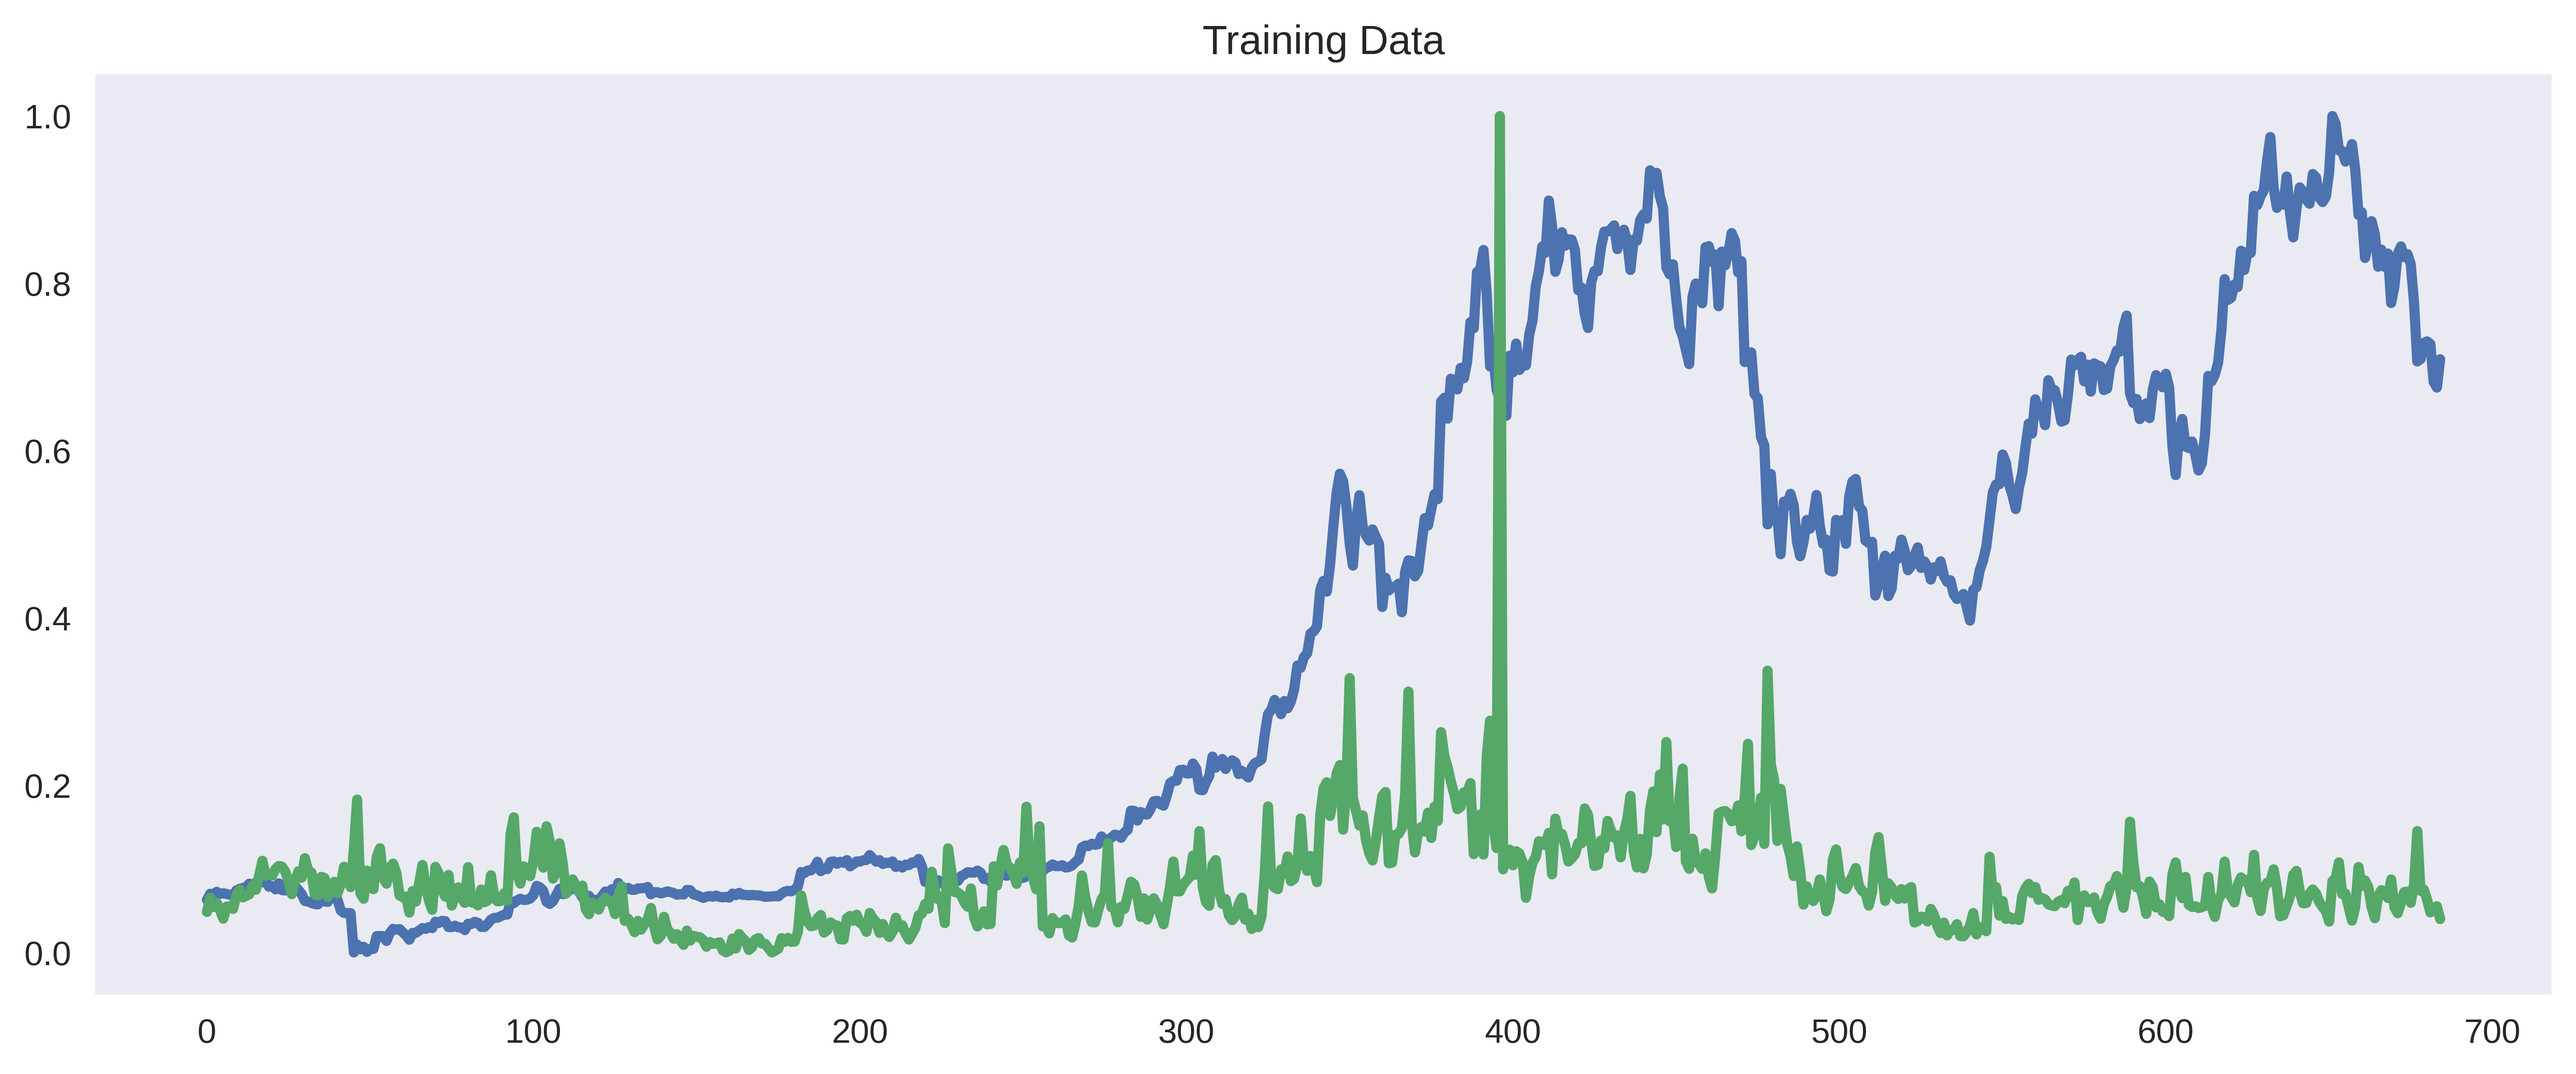

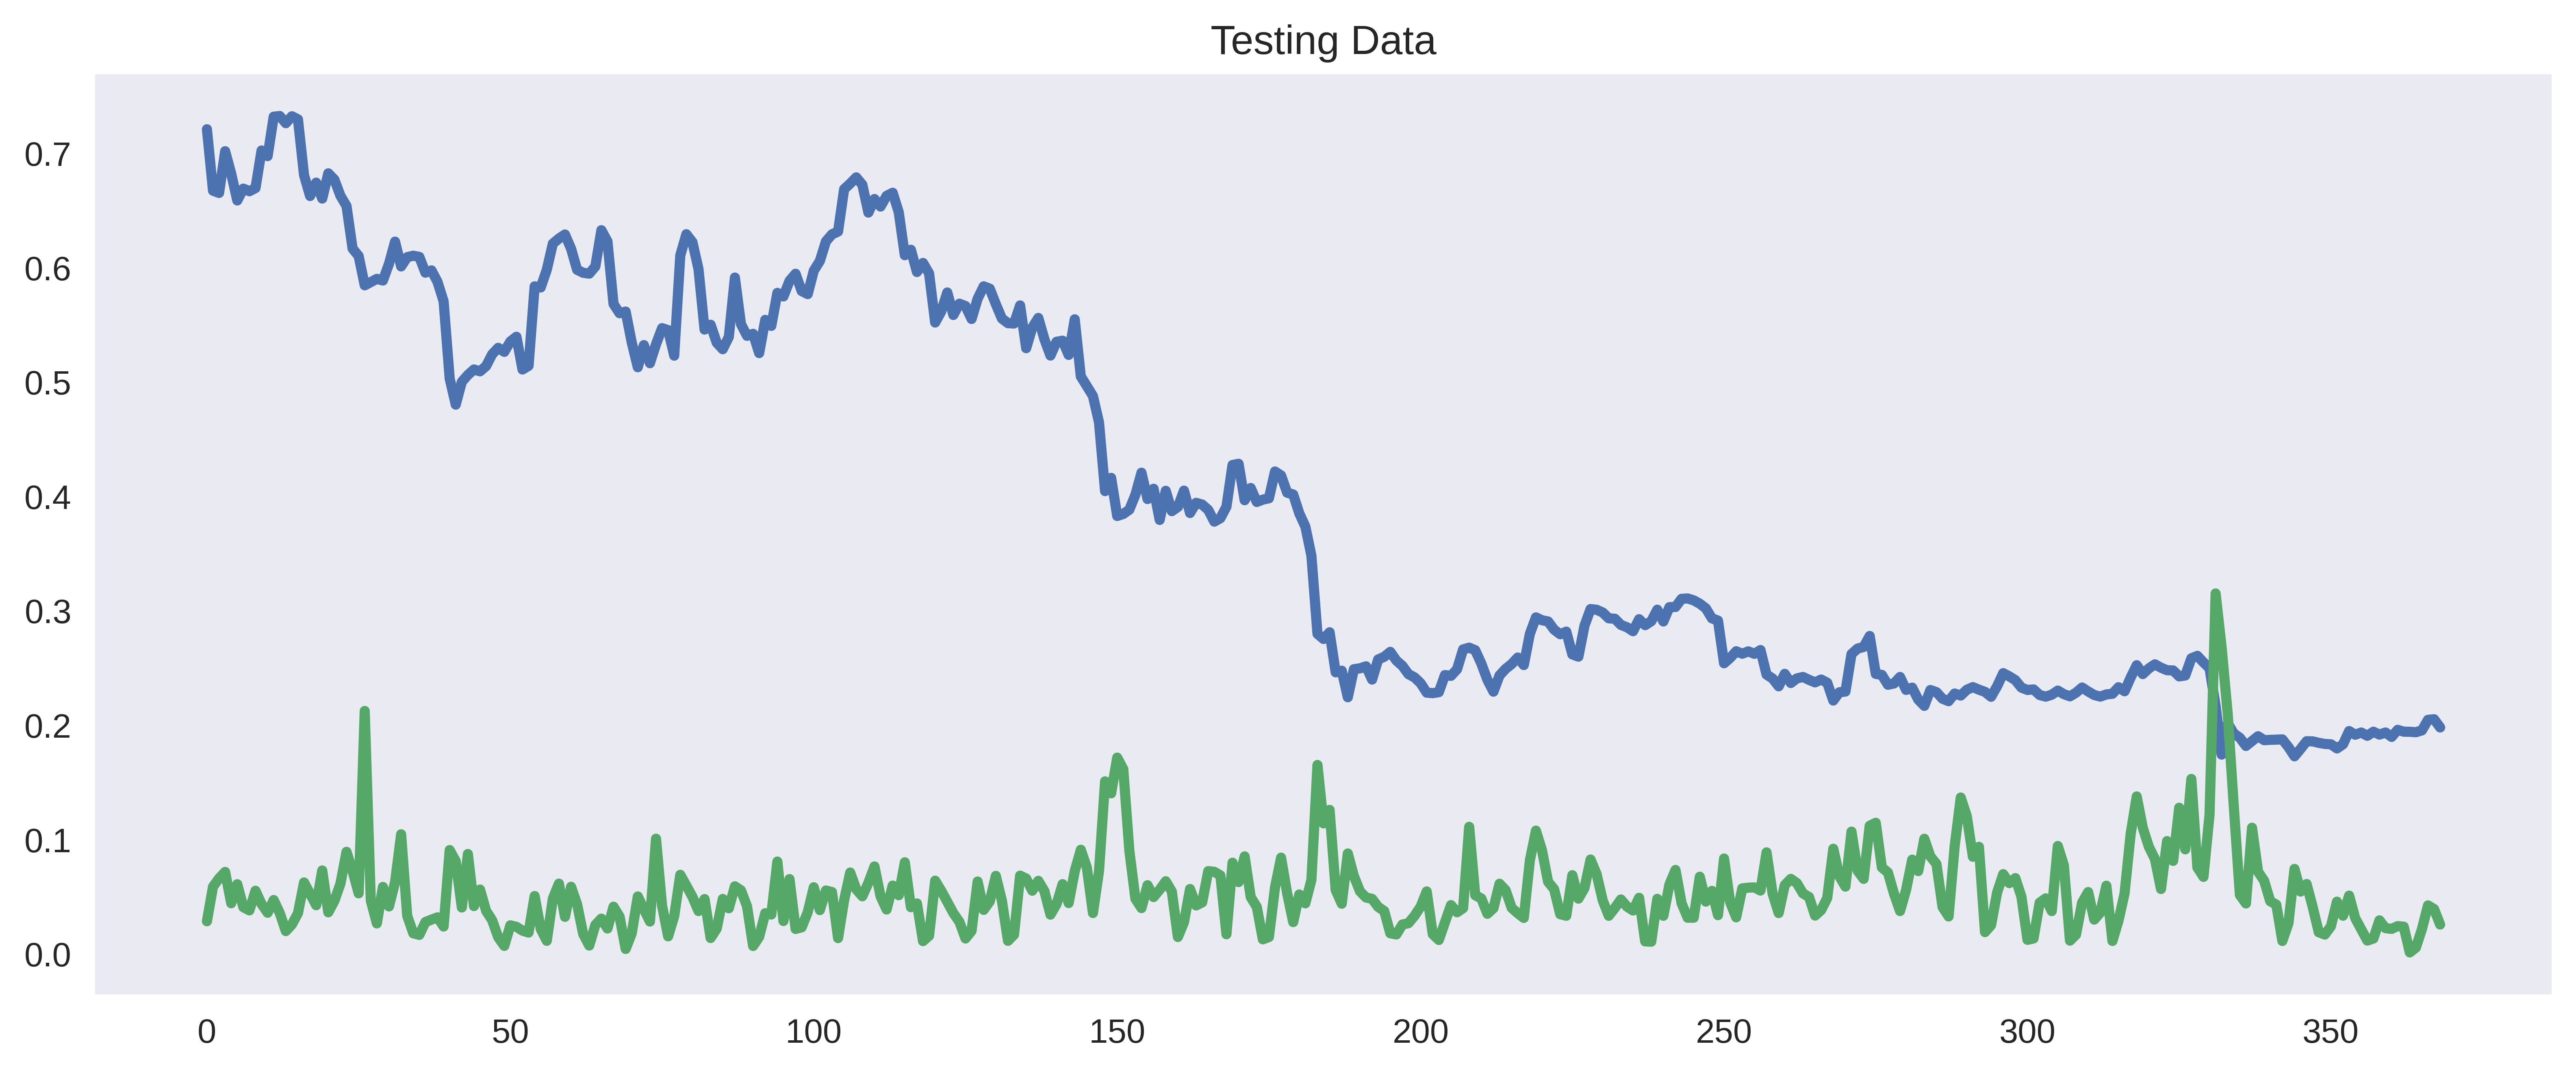

In [ ]:
# Define a data plotting function
def show_plot(data, title):
  plt.figure(figsize = (13, 5))
  plt.plot(data, linewidth = 3)
  plt.title(title)
  plt.grid()

show_plot(X_train, 'Training Data')
show_plot(X_test, 'Testing Data')

In [ ]:
from sklearn.linear_model import Ridge
# Note that Ridge regression performs linear least squares with L2 regularization.
# Create and train the Ridge Linear Regression  Model
regression_model = Ridge()

regression_model.fit(X_train, y_train)

Ridge()

In [ ]:
# Test the model and calculate its accuracy 
lr_accuracy = regression_model.score(X_test, y_test)
print("Linear Regression Score: ", lr_accuracy)

Linear Regression Score:  0.9900446485549041


In [ ]:
# Make Prediction
predicted_prices = regression_model.predict(X)
predicted_prices

array([[0.06919168],
       [0.07660882],
       [0.07570466],
       ...,
       [0.20814812],
       [0.20861346],
       [0.20124303]])

In [ ]:
# Append the predicted values into a list
Predicted = []
for i in predicted_prices:
  Predicted.append(i[0])

In [ ]:
len(Predicted)

1054

In [ ]:
# Append the close values to the list
close = []
for i in price_volume_target_scaled_df:
  close.append(i[0])

In [ ]:
# Create a dataframe based on the dates in the individual stock data
df_predicted = price_volume_target_df[['Date']]
df_predicted

,Date
0,2020-01-27
1,2020-01-28
2,2020-01-29
3,2020-01-30
4,2020-01-31
...,...
1049,2022-12-11
1050,2022-12-12
1051,2022-12-13
1052,2022-12-14


In [ ]:
# Add the close values to the dataframe
df_predicted['Close'] = close
df_predicted

,Date,Close
0,2020-01-27,0.062928
1,2020-01-28,0.070097
2,2020-01-29,0.069427
3,2020-01-30,0.072500
4,2020-01-31,0.069968
...,...,...
1049,2022-12-11,0.193837
1050,2022-12-12,0.195470
1051,2022-12-13,0.204654
1052,2022-12-14,0.205202


In [ ]:
# Add the predicted values to the dataframe
df_predicted['Prediction'] = Predicted
df_predicted

,Date,Close,Prediction
0,2020-01-27,0.062928,0.069192
1,2020-01-28,0.070097,0.076609
2,2020-01-29,0.069427,0.075705
3,2020-01-30,0.072500,0.078833
4,2020-01-31,0.069968,0.076153
...,...,...,...
1049,2022-12-11,0.193837,0.196703
1050,2022-12-12,0.195470,0.198670
1051,2022-12-13,0.204654,0.208148
1052,2022-12-14,0.205202,0.208613


In [ ]:
# Function to plot interactive plots using Plotly Express
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i)
  fig.show()

In [ ]:
# Plot the results
interactive_plot(df_predicted, "Original Vs. Prediction")

Red neuronal

TRAIN AN LSTM TIME SERIES MODEL

In [ ]:
data

,Date,Close,Volume,Target
0,2020-01-27,8909.819336,28647338393,9358.589844
1,2020-01-28,9358.589844,34398744403,9316.629883
2,2020-01-29,9316.629883,30682598115,9508.993164
3,2020-01-30,9508.993164,32378792851,9350.529297
4,2020-01-31,9350.529297,29432489719,9392.875000
...,...,...,...,...
1050,2022-12-12,17206.437500,19617581341,17781.318359
1051,2022-12-13,17781.318359,26634741631,17815.650391
1052,2022-12-14,17815.650391,25534481470,17364.865234
1053,2022-12-15,17364.865234,20964448341,16647.484375


In [ ]:
price_volume_df = data
price_volume_df

,Date,Close,Volume,Target
0,2020-01-27,8909.819336,28647338393,9358.589844
1,2020-01-28,9358.589844,34398744403,9316.629883
2,2020-01-29,9316.629883,30682598115,9508.993164
3,2020-01-30,9508.993164,32378792851,9350.529297
4,2020-01-31,9350.529297,29432489719,9392.875000
...,...,...,...,...
1050,2022-12-12,17206.437500,19617581341,17781.318359
1051,2022-12-13,17781.318359,26634741631,17815.650391
1052,2022-12-14,17815.650391,25534481470,17364.865234
1053,2022-12-15,17364.865234,20964448341,16647.484375


In [ ]:
# Get the close and volume data as training data (Input)
training_data = price_volume_df.iloc[:, 1:3].values
training_data

array([[8.90981934e+03, 2.86473384e+10],
       [9.35858984e+03, 3.43987444e+10],
       [9.31662988e+03, 3.06825981e+10],
       ...,
       [1.78156504e+04, 2.55344815e+10],
       [1.73648652e+04, 2.09644483e+10],
       [1.66474844e+04, 2.40316090e+10]])

In [ ]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_data)

In [ ]:
# Create the training and testing data, training data contains present day and previous day values
X = []
y = []
for i in range(1, len(price_volume_df)):
    X.append(training_set_scaled [i-1:i, 0])
    y.append(training_set_scaled [i, 0])

In [ ]:
X

[array([0.0629278]),
 array([0.07009711]),
 array([0.06942678]),
 array([0.07249987]),
 array([0.06996834]),
 array([0.07064483]),
 array([0.06986987]),
 array([0.06905762]),
 array([0.06725944]),
 array([0.0741682]),
 array([0.07602739]),
 array([0.07708403]),
 array([0.07818915]),
 array([0.08220785]),
 array([0.07805323]),
 array([0.0836706]),
 array([0.0855528]),
 array([0.08376875]),
 array([0.08533013]),
 array([0.07857744]),
 array([0.07929648]),
 array([0.07539382]),
 array([0.08261238]),
 array([0.07448712]),
 array([0.07408915]),
 array([0.07533469]),
 array([0.07496311]),
 array([0.07913803]),
 array([0.07475532]),
 array([0.06982737]),
 array([0.06150124]),
 array([0.06092568]),
 array([0.0591358]),
 array([0.05797045]),
 array([0.05737849]),
 array([0.0622864]),
 array([0.06097827]),
 array([0.06045843]),
 array([0.06562675]),
 array([0.06632621]),
 array([0.06292996]),
 array([0.05012023]),
 array([0.04717321]),
 array([0.04695092]),
 array([0.04697809]),
 array([0.]),
 a

In [ ]:
# Convert the data into array format
X = np.asarray(X)
y = np.asarray(y)

In [ ]:
# Split the data
split = int(0.7 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [ ]:
# Reshape the 1D arrays to 3D arrays to feed in the model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_train.shape, X_test.shape

((737, 1, 1), (317, 1, 1))

In [ ]:
# Create the model
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150)(x)
outputs = keras.layers.Dense(1, activation='linear')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 1)]            0         
                                                                 
 lstm (LSTM)                 (None, 1, 150)            91200     
                                                                 
 dropout (Dropout)           (None, 1, 150)            0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 150)            180600    
                                                                 
 dropout_1 (Dropout)         (None, 1, 150)            0         
                                                                 
 lstm_2 (LSTM)               (None, 150)               180600    
                                                                 
 dense (Dense)               (None, 1)                 151   

In [ ]:
# Trai the model
history = model.fit(
    X_train, y_train,
    epochs = 20,
    batch_size = 32,
    validation_split = 0.2
)

Epoch 1/20
19/19 [==============================] - 10s 86ms/step - loss: 0.1378 - val_loss: 0.1751
Epoch 2/20
19/19 [==============================] - 0s 15ms/step - loss: 0.0465 - val_loss: 0.0551
Epoch 3/20
19/19 [==============================] - 0s 14ms/step - loss: 0.0203 - val_loss: 0.0014
Epoch 4/20
19/19 [==============================] - 0s 14ms/step - loss: 0.0038 - val_loss: 0.0028
Epoch 5/20
19/19 [==============================] - 0s 15ms/step - loss: 0.0027 - val_loss: 0.0012
Epoch 6/20
19/19 [==============================] - 0s 14ms/step - loss: 0.0022 - val_loss: 0.0011
Epoch 7/20
19/19 [==============================] - 0s 14ms/step - loss: 0.0019 - val_loss: 0.0010
Epoch 8/20
19/19 [==============================] - 0s 14ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 9/20
19/19 [==============================] - 0s 14ms/step - loss: 0.0016 - val_loss: 0.0010
Epoch 10/20
19/19 [==============================] - 0s 15ms/step - loss: 0.0020 - val_loss: 8.5286e-04
Epoc

In [ ]:
# Make prediction
predicted = model.predict(X)

33/33 [==============================] - 1s 5ms/step


In [ ]:
# Append the predicted values to the list
test_predicted = []

for i in predicted:
  test_predicted.append(i[0])

In [ ]:
test_predicted

[0.05944758,
 0.06653105,
 0.06586872,
 0.06890522,
 0.06640382,
 0.06707224,
 0.06630652,
 0.065503955,
 0.06372726,
 0.07055374,
 0.07239091,
 0.07343504,
 0.0745271,
 0.078498445,
 0.074392796,
 0.07994401,
 0.08180413,
 0.080041,
 0.08158405,
 0.074910805,
 0.07562137,
 0.07176483,
 0.07889822,
 0.07086888,
 0.07047564,
 0.0717064,
 0.07133922,
 0.075464785,
 0.0711339,
 0.066264525,
 0.05803819,
 0.05746957,
 0.055701304,
 0.05455006,
 0.053965267,
 0.058813885,
 0.05752152,
 0.05700795,
 0.06211411,
 0.06280519,
 0.059449703,
 0.04679548,
 0.04388467,
 0.043665104,
 0.043691948,
 -0.0026808083,
 0.006664468,
 0.00093734823,
 0.0039627887,
 -0.0019922573,
 0.0013355296,
 0.0015374143,
 0.016557435,
 0.016677044,
 0.016460828,
 0.010866519,
 0.02010739,
 0.025130231,
 0.024282653,
 0.0248406,
 0.020950824,
 0.01736164,
 0.012313655,
 0.02032071,
 0.020459525,
 0.02311105,
 0.026057955,
 0.025107887,
 0.02722358,
 0.0260186,
 0.033600256,
 0.03209586,
 0.034583334,
 0.034078375,
 0.

In [ ]:
df_predicted = price_volume_df[1:][['Date']]
df_predicted

,Date
1,2020-01-28
2,2020-01-29
3,2020-01-30
4,2020-01-31
5,2020-02-01
...,...
1050,2022-12-12
1051,2022-12-13
1052,2022-12-14
1053,2022-12-15


In [ ]:
df_predicted['predictions'] = test_predicted

In [ ]:
df_predicted

,Date,predictions
1,2020-01-28,0.059448
2,2020-01-29,0.066531
3,2020-01-30,0.065869
4,2020-01-31,0.068905
5,2020-02-01,0.066404
...,...,...
1050,2022-12-12,0.188828
1051,2022-12-13,0.190441
1052,2022-12-14,0.199514
1053,2022-12-15,0.200055


In [ ]:
# Plot the data
close = []
for i in training_set_scaled:
  close.append(i[0])

In [ ]:
df_predicted['Close'] = close[1:]

In [ ]:
df_predicted

,Date,predictions,Close
1,2020-01-28,0.059448,0.070097
2,2020-01-29,0.066531,0.069427
3,2020-01-30,0.065869,0.072500
4,2020-01-31,0.068905,0.069968
5,2020-02-01,0.066404,0.070645
...,...,...,...
1050,2022-12-12,0.188828,0.195470
1051,2022-12-13,0.190441,0.204654
1052,2022-12-14,0.199514,0.205202
1053,2022-12-15,0.200055,0.198001


In [ ]:
# Plot the data
interactive_plot(df_predicted, "Original Vs LSTM Prediction")

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,8597.308594,8977.726563,8597.308594,8909.819336,8909.819336,28647338393
1,2020-01-28,8912.524414,9358.589844,8908.447266,9358.589844,9358.589844,34398744403
2,2020-01-29,9357.470703,9406.431641,9269.467773,9316.629883,9316.629883,30682598115
3,2020-01-30,9316.016602,9553.125977,9230.897461,9508.993164,9508.993164,32378792851
4,2020-01-31,9508.313477,9521.706055,9230.776367,9350.529297,9350.529297,29432489719
...,...,...,...,...,...,...,...
1050,2022-12-12,17102.500000,17212.564453,16899.394531,17206.437500,17206.437500,19617581341
1051,2022-12-13,17206.441406,17930.085938,17111.763672,17781.318359,17781.318359,26634741631
1052,2022-12-14,17782.066406,18318.531250,17739.513672,17815.650391,17815.650391,25534481470
1053,2022-12-15,17813.644531,17846.744141,17322.589844,17364.865234,17364.865234,20964448341


In [19]:
!pip install prophet


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
import pandas as pd
from prophet import Prophet

In [22]:
dataframe = pd.read_csv('/content/BTC-USD.csv')


In [23]:
dataframe.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,8597.308594,8977.726563,8597.308594,8909.819336,8909.819336,28647338393
1,2020-01-28,8912.524414,9358.589844,8908.447266,9358.589844,9358.589844,34398744403
2,2020-01-29,9357.470703,9406.431641,9269.467773,9316.629883,9316.629883,30682598115
3,2020-01-30,9316.016602,9553.125977,9230.897461,9508.993164,9508.993164,32378792851
4,2020-01-31,9508.313477,9521.706055,9230.776367,9350.529297,9350.529297,29432489719


In [24]:
dataframe = dataframe[["Date","Close"]]

In [25]:
dataframe.head()

,Date,Close
0,2020-01-27,8909.819336
1,2020-01-28,9358.589844
2,2020-01-29,9316.629883
3,2020-01-30,9508.993164
4,2020-01-31,9350.529297


In [26]:
dataframe.columns = ['ds', 'y']
dataframe.head()

,ds,y
0,2020-01-27,8909.819336
1,2020-01-28,9358.589844
2,2020-01-29,9316.629883
3,2020-01-30,9508.993164
4,2020-01-31,9350.529297


In [27]:
p = Prophet(interval_width=0.92, daily_seasonality=True)


In [28]:
model = p.fit(dataframe)


DEBUG:cmdstanpy:input tempfile: /tmp/tmpdeet2zhy/_o7cvd6w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdeet2zhy/i3kpdo7t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41831', 'data', 'file=/tmp/tmpdeet2zhy/_o7cvd6w.json', 'init=/tmp/tmpdeet2zhy/i3kpdo7t.json', 'output', 'file=/tmp/tmpdeet2zhy/prophet_modeln9li9zqn/prophet_model-20230127020414.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:04:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:04:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [49]:
future = p.make_future_dataframe(periods=50, freq='D')
future.tail()

,ds
1100,2023-01-31
1101,2023-02-01
1102,2023-02-02
1103,2023-02-03
1104,2023-02-04


In [50]:
forecast_prediction = p.predict(future)
forecast_prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1100,2023-01-31,11272.043343,336.887461,13164.748573,7433.101996,15056.353197,-4462.312488,-4462.312488,-4462.312488,-2725.348553,...,-13.204110,-13.204110,-13.204110,-1723.759826,-1723.759826,-1723.759826,0.0,0.0,0.0,6809.730855
1101,2023-02-01,11179.849045,569.784772,13942.775604,7220.482419,15138.200643,-4000.952847,-4000.952847,-4000.952847,-2725.348553,...,85.602405,85.602405,85.602405,-1361.206700,-1361.206700,-1361.206700,0.0,0.0,0.0,7178.896198
1102,2023-02-02,11087.654746,625.102451,14291.817377,7006.809281,15167.179192,-3701.778010,-3701.778010,-3701.778010,-2725.348553,...,-13.726850,-13.726850,-13.726850,-962.702608,-962.702608,-962.702608,0.0,0.0,0.0,7385.876736
1103,2023-02-03,10995.460448,1301.548320,14711.740947,6671.125014,15294.290968,-3280.833409,-3280.833409,-3280.833409,-2725.348553,...,-19.885134,-19.885134,-19.885134,-535.599723,-535.599723,-535.599723,0.0,0.0,0.0,7714.627039
1104,2023-02-04,10903.266150,1081.104652,14757.393744,6472.738956,15366.012028,-2842.417653,-2842.417653,-2842.417653,-2725.348553,...,-29.218763,-29.218763,-29.218763,-87.850338,-87.850338,-87.850338,0.0,0.0,0.0,8060.848497


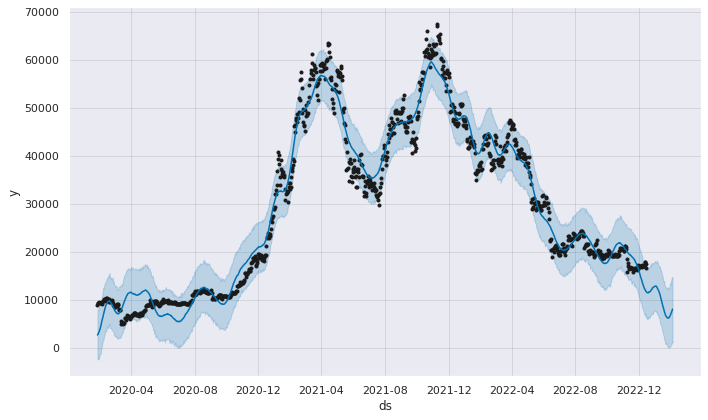

In [51]:
plot1 = p.plot(forecast_prediction)


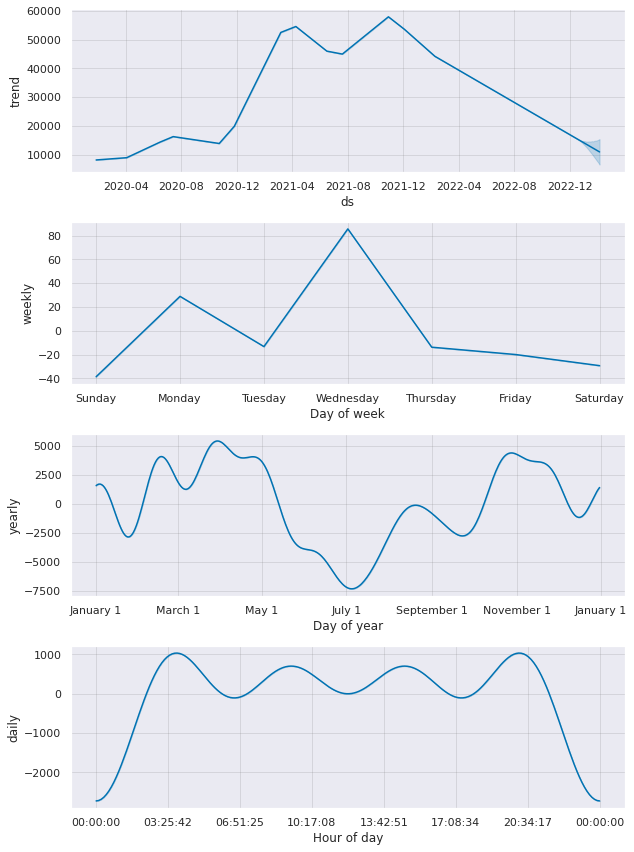

In [52]:
plot2 = p.plot_components(forecast_prediction)
